In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# 读取cvs训练数据集
cvs_path = "./data/csv/Molecular_Descriptor_train.csv"
df = pd.read_csv(cvs_path, index_col=0)

In [14]:
# 表格头部
df.head()

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,pIC50
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,...,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166,8.602
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,...,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174,8.125
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,...,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176,8.509
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174,8.409
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,...,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174,8.131


In [15]:
#表格信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 1973
Columns: 731 entries, SMILES to pIC50
dtypes: float64(360), int64(370), object(1)
memory usage: 11.0+ MB


In [16]:
# 去除sum为0的列和方差过小的列
sum_zero_count = 0
var_count = 0
delete = []
for index, row in df.iteritems():
    if index != "SMILES" and index != "pIC50":
        #计算该列和
        row = (row - row.min()) / (row.max() - row.min())

        if df[index].sum() == 0:
            df[index] = row
            delete.append((index))
            sum_zero_count = sum_zero_count + 1
            continue

        if row.var() < 0:
            r = row.var()
            var_count = var_count + 1
            delete.append((index))

final_sum = df.shape[1] - 1 - var_count - sum_zero_count
print("最终剩列", final_sum)
print("sum 0 列: ", sum_zero_count, "方差过小", var_count)
print(delete)
#删除sum为0后的数据
handle_df = df.drop(delete, axis=1)

最终剩列 505
sum 0 列:  225 方差过小 0
['nB', 'nBondsQ', 'nHsNH3p', 'nHssNH2p', 'nHsssNHp', 'nHmisc', 'nsLi', 'nssBe', 'nssssBem', 'nsBH2', 'nssBH', 'nsssB', 'nssssBm', 'nddC', 'nsNH3p', 'nssNH2p', 'nsssNHp', 'nddsN', 'naOm', 'nsSiH3', 'nssSiH2', 'nsssSiH', 'nssssSi', 'nsPH2', 'nssPH', 'nsssP', 'nddsP', 'nsssssP', 'nssssssS', 'nSm', 'nsGeH3', 'nssGeH2', 'nsssGeH', 'nssssGe', 'nsAsH2', 'nssAsH', 'nsssAs', 'ndsssAs', 'nddsAs', 'nsssssAs', 'nsSeH', 'ndSe', 'nssSe', 'naaSe', 'ndssSe', 'nssssssSe', 'nddssSe', 'nsSnH3', 'nssSnH2', 'nsssSnH', 'nssssSn', 'nsPbH3', 'nssPbH2', 'nsssPbH', 'nssssPb', 'SHsNH3p', 'SHssNH2p', 'SHsssNHp', 'SHmisc', 'SsLi', 'SssBe', 'SssssBem', 'SsBH2', 'SssBH', 'SsssB', 'SssssBm', 'SddC', 'SsNH3p', 'SssNH2p', 'SsssNHp', 'SddsN', 'SaOm', 'SsSiH3', 'SssSiH2', 'SsssSiH', 'SssssSi', 'SsPH2', 'SssPH', 'SsssP', 'SddsP', 'SsssssP', 'SssssssS', 'SSm', 'SsGeH3', 'SssGeH2', 'SsssGeH', 'SssssGe', 'SsAsH2', 'SssAsH', 'SsssAs', 'SdsssAs', 'SddsAs', 'SsssssAs', 'SsSeH', 'SdSe', 'SssSe', 'Sa

In [17]:
df = handle_df
df.shape

(1974, 506)

In [18]:
# 数据分割
from sklearn.model_selection import train_test_split

X = df.drop(['SMILES', 'pIC50'], axis=1)
y = df['pIC50']
feature_names = list(X)  #所有列名
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

In [19]:
#3 随机森林

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(min_samples_split=6, n_estimators=100)
rf.fit(X, y)
# model的feature_importances_ 参数排序
rank_impotant = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feature_names), reverse=True)
# 展示前20个
feature_final = pd.DataFrame(rank_impotant).head(20)


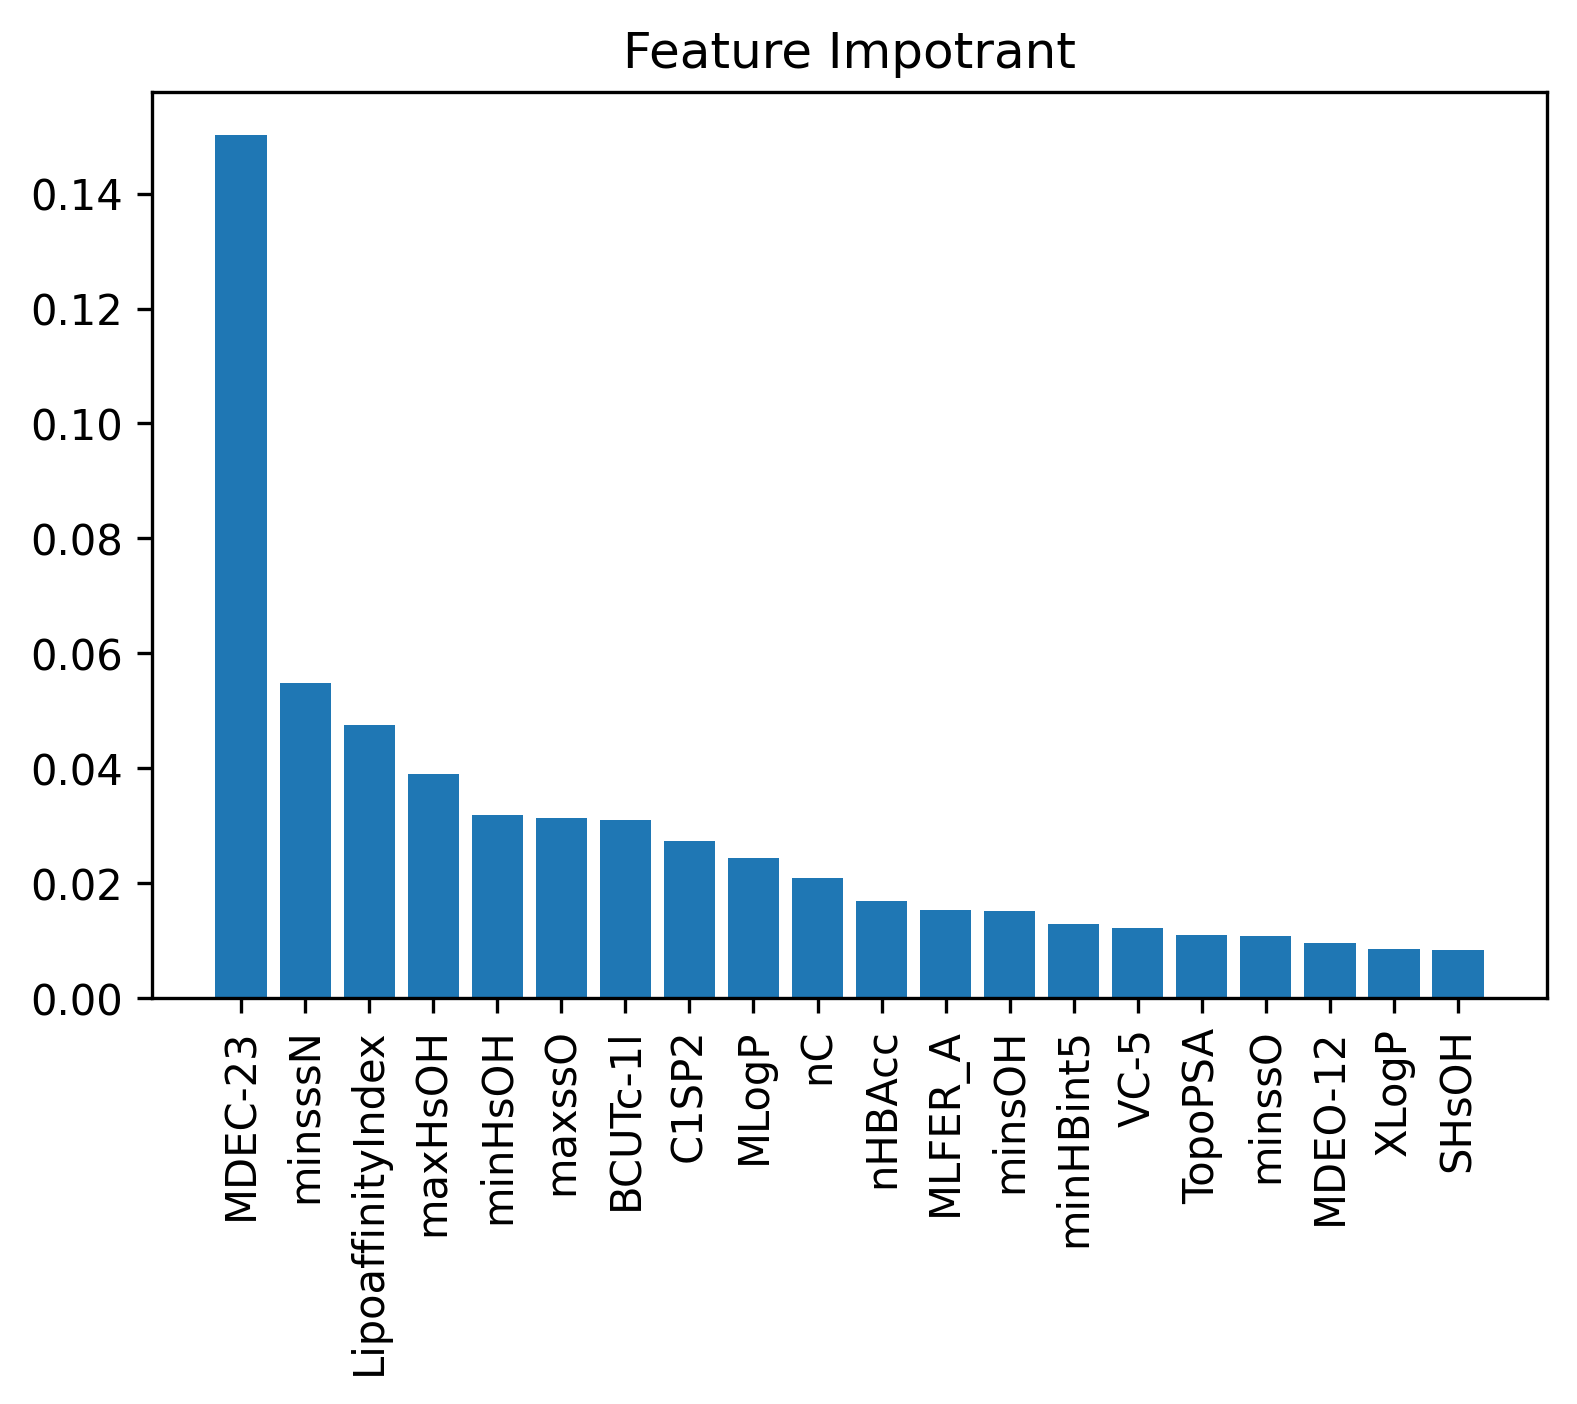

In [20]:
# 特征画图
features_importance_val = feature_final[0]
features_importance_name = feature_final[1]

figure = plt.figure(dpi=300)
plt.title("Feature Impotrant")
plt.bar(range(len(features_importance_name)), features_importance_val, orientation='vertical')
plt.xticks(range(len(features_importance_name)), features_importance_name, rotation='vertical')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

#A helper method for pretty-printing linear models
lr = LinearRegression()


def pretty_print_linear(coefs, names=None, sort=False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key=lambda x: x[0], reverse=True)
    return lst
    # return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)


/Users/zile/PycharmProjects/pyTorch_study/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797.7613956977249, tolerance: 0.39954775887684907
  model = cd_fast.enet_coordinate_descent(


Lasso model:  [(0.05828825929750675, 'maxsOH'), (0.04578547959172856, 'C3SP2'), (0.03456523094588719, 'C1SP3'), (0.03452227614346615, 'nHCsats'), (0.03361447174265, 'MDEC-23'), (0.0324648403384461, 'minHBint10'), (0.03160347960504834, 'SHBint8'), (0.028439696302339543, 'ATSm5'), (0.02727661411381083, 'SHBint5'), (0.023228500375573512, 'BCUTw-1h'), (0.023202793641806045, 'SHBa'), (0.021431814645376066, 'SsF'), (0.018963405246139847, 'AMR'), (0.011652431033508244, 'MDEC-33'), (0.007711368519416511, 'minHBint9'), (0.0057890903448440416, 'MDEC-22'), (0.005657862918011932, 'minHBint7'), (0.005123810918711462, 'SsOH'), (0.004847461159101538, 'ATSp1'), (0.004803661261715751, 'Zagreb'), (0.0031977295924454432, 'SHBint9'), (0.002268821446706285, 'minHBint5'), (0.0012020119440565146, 'SaaNH'), (0.0008409648714568663, 'maxsF'), (0.0007375163927212824, 'ECCEN'), (0.00015620492568344015, 'ATSp2'), (4.2850054776909996e-05, 'fragC'), (0.0, 'nAcid'), (0.0, 'ALogP'), (0.0, 'ALogp2'), (0.0, 'apol'), (0.

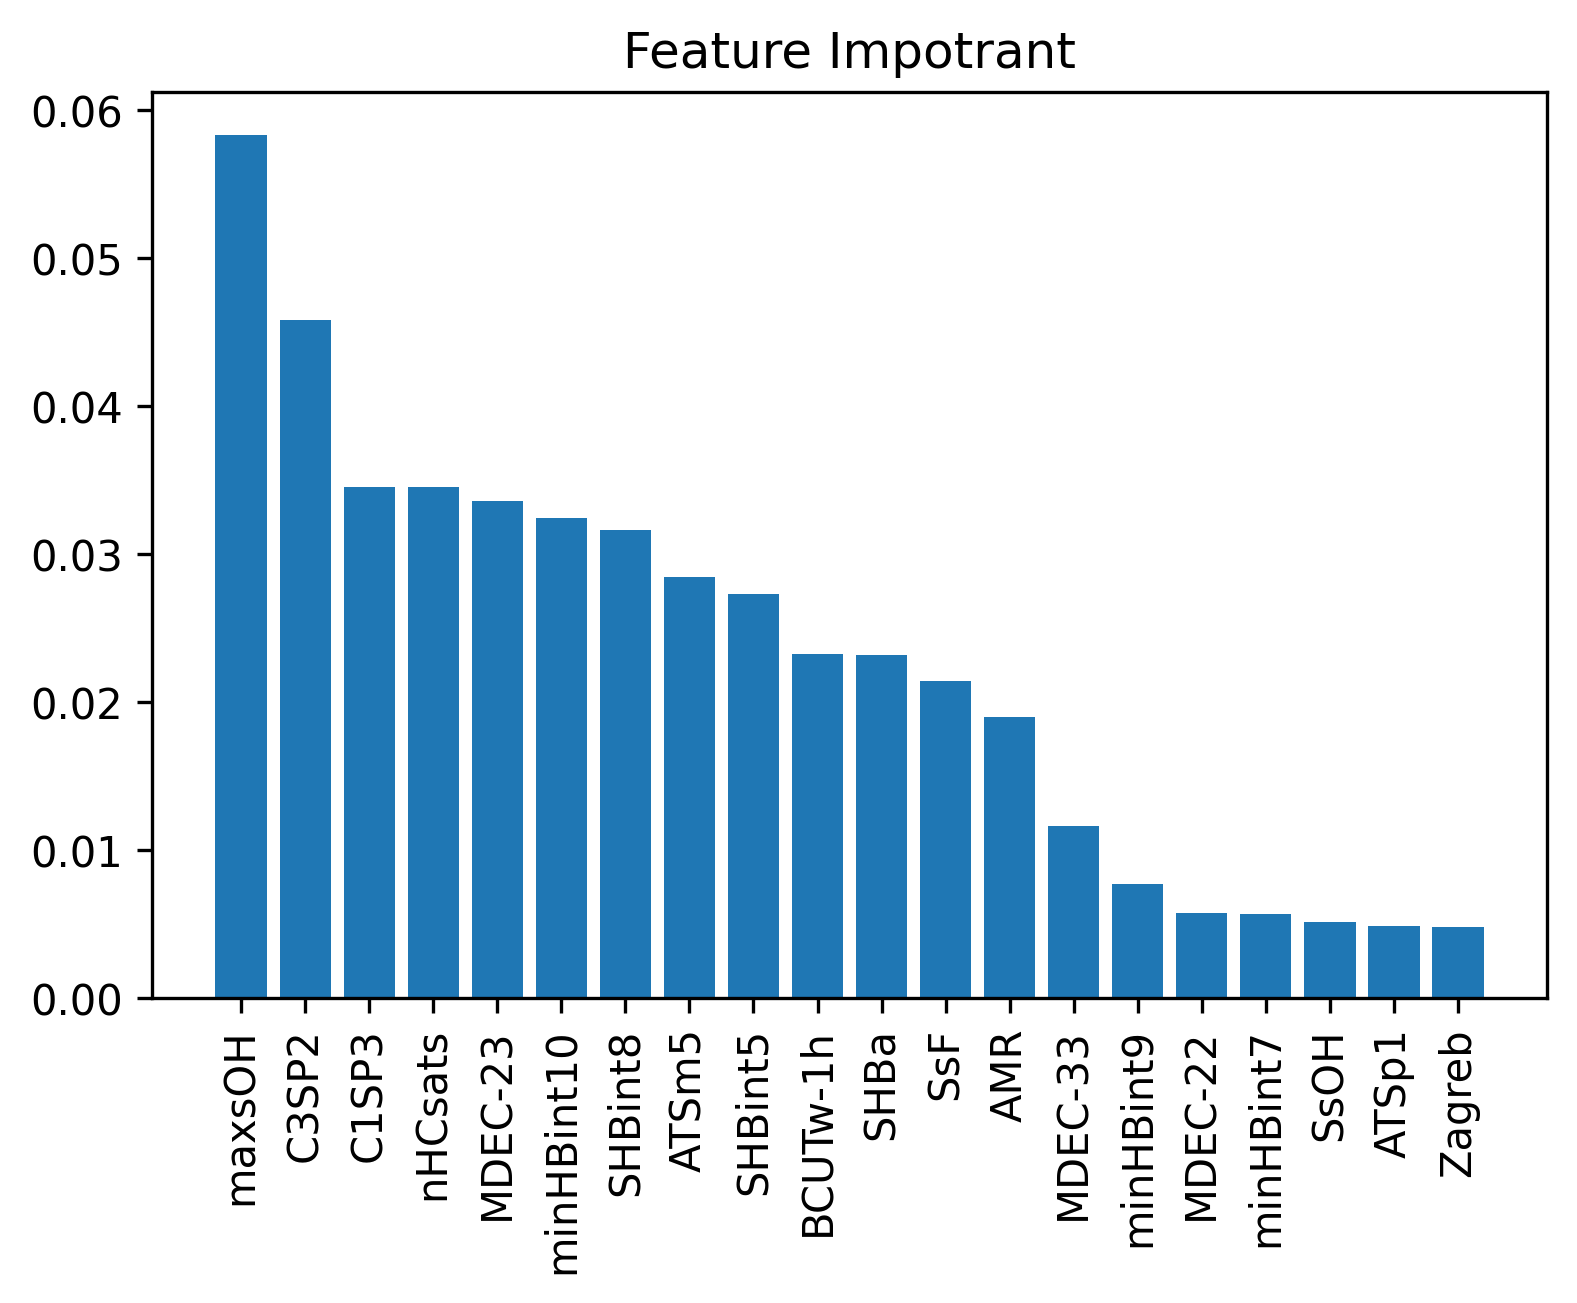

In [23]:
# Lasso特征提取

from sklearn.linear_model import Lasso  #为线性回归提供了Lasso

plt.figure(dpi=300)
lasso = Lasso(alpha=.1)  #alpha越大，模型越稀疏，越多特征系数变为0，
lasso.fit(X, y)
ret = pretty_print_linear(lasso.coef_, feature_names, sort=True)
lasso_ret = pd.DataFrame(ret).head(30)
print("Lasso model: ", pretty_print_linear(lasso.coef_, feature_names, sort=True))
plt.title("Feature Impotrant")
plt.bar(range(len(lasso_ret[1][:20])), lasso_ret[0][:20], orientation='vertical')
plt.xticks(range(len(lasso_ret[1][:20])), lasso_ret[1][:20], rotation='vertical')
plt.show()


/Users/zile/PycharmProjects/machine_learning/venv/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


X_shape: (1974, 332)
new_X_shape: (1974, 0)


/Users/zile/PycharmProjects/machine_learning/venv/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"
/Users/zile/PycharmProjects/machine_learning/venv/lib/python3.8/site-packages/sklearn/feature_selection/_base.py:90: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


IndexError: index 0 is out of bounds for axis 1 with size 0

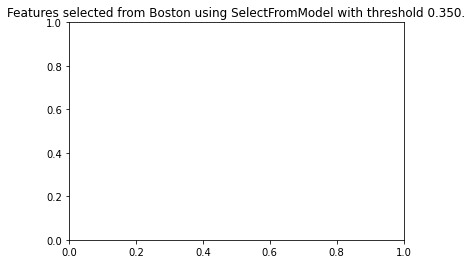

In [16]:
from sklearn.feature_selection import SelectFromModel

clf = Lasso()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[0]

print('X_shape:', X.shape)
print('new_X_shape:', sfm.transform(X).shape)

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()


In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# lr = Ridge(alpha=100000, fit_intercept=True, normalize=True,
#            copy_X=True, max_iter=1500, tol=1e-4, solver='auto')

# lr = DecisionTreeRegressor()
lr = LinearRegression()

# 这里不带交叉验证的部分
# estimator估计函数
rfe = RFE(estimator=lr, n_features_to_select=20)
rfe.fit(X, y)
# 和传参对应，所选择的属性的个数
print(rfe.n_features_)
# 打印的是相应位置上属性的排名
print(rfe.ranking_)
# 属性选择的一种模糊表示，选择的是true，未选择的是false
print(rfe.support_)
# 外部估计函数的相关信息
print(rfe.estimator_)

20
[431 392 460 414   1  29  28   1   1   1   1   1   1   1   1   1   4   1
   1   3 210 434 232 233 247  11 336 433 422 401 466 473 468 470 479 393
 295 437 269 223 377 360   7   8  15   5   6  14  41  40  53 335  16 114
 371 343 338 342 341 332 339 285 197 262 209 214 286 198 202 266 211 213
 204 207 205 241 240 212 264 208 263 267 243 254 265  25 171 200 203 206
 255 268 292 102 344 280 326 256 257 400 370 416 409 474  59 298  48  35
 394 376 385 411 372 402 375 420 430  20  67  73  52  43  18  78  58  66
  61 281 328 314 312  34  45  54  44  81  62  65  32  13  74  75  76  26
  55  63  42  17  27  46  47  33  49  22  19  36  37  30  72   1   1  69
  50 449  31  68  38   2   1   1  98 279 140 139 383 450 459 472 485 456
 453 421 462 101  89  77 103  99 100 104 215 235 324 282 391 313 322 318
 136 156 137 475 144 151 132 160 135 157 150 138 106  95 129 131 463 291
 337 148 128  21 143 133 146 130 482 147 190  84 152 145 149  57 407 396
 141 142 277 296 454 347 397 439 403 413 423 405

In [37]:
ret = pd.DataFrame(X.columns, index=rfe.ranking_, columns=['Rank']).sort_index(ascending=True).head(20)
list(ret['Rank'])

['MDEC-23', 'MLogP', 'LipoaffinityIndex', 'maxsOH', 'nC',
 'nT6Ring', 'minsssN', 'BCUTp-1h', 'C2SP2', 'AMR', "WPOL",
 'SP-5', 'CrippenLogP', "MDEC-22", 'nBonds2', 'Zagreb','ATSp4',
 'VAdjMat','ATSc3',"ETA_Alpha" ]

['nsI',
 'ETA_Alpha',
 'ETA_Eta_R_L',
 'ETA_Eta_B',
 'nHBAcc_Lipinski',
 'nI',
 'nBr',
 'nP',
 'nS',
 'nO',
 'nN',
 'nF',
 'nH',
 'nsF',
 'apol',
 'nC',
 'ndsssP',
 'nsBr',
 'nAtom',
 'nHeavyAtom']

In [47]:
type(ret)
pd.DataFrame(columns=ret['Rank'].values)

,nsI,ETA_Alpha,ETA_Eta_R_L,ETA_Eta_B,nHBAcc_Lipinski,nI,nBr,nP,nS,nO,nN,nF,nH,nsF,apol,nC,ndsssP,nsBr,nAtom,nHeavyAtom


In [26]:
import numpy as np
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 100, 50), activation='relu', solver='adam', alpha=0.01, max_iter=2000, shuffle=True,
    random_state=1)
model_mlp.fit(X, y)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100, 50), max_iter=2000,
             random_state=1)

sklearn多层感知器-回归模型得分 0.5093788277503453
总时间是： 0.01403498649597168


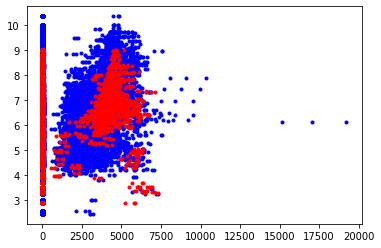

In [15]:
import time

startTime = time.time()
mlp_score = model_mlp.score(X_test, y_test)
print('sklearn多层感知器-回归模型得分', mlp_score)  #预测正确/总数
result = model_mlp.predict(X_test)
stopTime = time.time()
sumTime = stopTime - startTime
print('总时间是：', sumTime)
plt.plot(X, y, 'b.')
plt.plot(X_test, result, 'r.')
plt.show()